In [104]:
#Q1 E Q2
import requests
from bs4 import BeautifulSoup as soup
import pymongo
from pymongo import MongoClient
from selenium import webdriver
#AJUSTAR CONNECTION
cluster = MongoClient('connection string')
db = cluster["concursos"]
tb = db["megasena"]

def getConcurso(numero):
    options = webdriver.FirefoxOptions()
    options.add_argument('headless')
    options.add_argument('window-size=1920x1080')
    #AJUSTAR PATH
    driver = webdriver.Firefox(executable_path = r'geckodriver.exe path', options = options)
    url = 'https://www.loteriaseresultados.com.br/index.php/megasena/concurso/' + numero
    driver.get(url)
    
    try:
        body = driver.find_element_by_tag_name('body')
        html = body.get_attribute('innerHTML')
        soupPage = soup(html, 'html5lib')
        spanList = soupPage.findAll( "span", class_='white--text font-weight-bold')
        numSorteados = []
        concGanha = soupPage.findAll('td', class_='text-center')
        premio = soupPage.findAll('td', class_='text-right')
        
        for n in range(6):
            numSorteados.append(int(spanList[n].text))
        #Q1 PARA ADICIONAR APENAS O RESULTADO DA MEGASENA
        #tb.insert_one({numero: numSorteados})
        #Q2 PARA ADICIONAR RESULTADO DA MEGASENA E INFOS DOS OUTROS CONCURSOS
        """
        tb.insert_one({numero: {
            'resultSena': numSorteados,
            concGanha[0].text: {'ganhadores': str(concGanha[1].text),'valor': str(premio[0].text)},
            concGanha[2].text: {'ganhadores': str(concGanha[3].text),'valor': str(premio[1].text)},
            concGanha[4].text: {'ganhadores': str(concGanha[5].text),'valor': str(premio[2].text)}}
        })
        """
    except:
        print('criterio nao encontrado')
    
    print('Terminei a raspagem de dados')
    driver.close()
getConcurso("2340")

Terminei a raspagem de dados


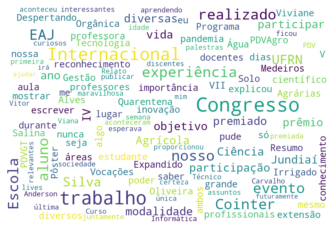

In [1]:
#Q3
import requests
from bs4 import BeautifulSoup as soup
from selenium import webdriver

options = webdriver.FirefoxOptions()
options.add_argument('headless')
options.add_argument("disable-infobars")
options.add_argument("--disable-extensions")
#AJUSTAR PATH
driver = webdriver.Firefox(executable_path = r'geckodriver.exe path', options = options)

def getList(urlList):
    temp = ""
    try:
        for n in range(len(urlList)):
            driver.get(urlList[n])
            spanList = driver.find_elements_by_css_selector("span[style='font-weight: 400;']")
            for n in range(len(spanList)):
                temp += " "+spanList[n].text 
            temp += "\n\n"
        return temp
    except Exception as e:
        print(e) 
    print('Terminei a raspagem de dados')    
    driver.close()

urlList = []
f = open("url_eaj_news.txt", "r")
for x in f:
    urlList.append(x.rstrip("\n"))
    
bigText = getList(urlList)

from wordcloud import WordCloud, STOPWORDS

STOPWORDS = ['ver','principal','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'os','as','da','como','dos','ou','se','um','uma',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o', 'e', 'no', 'do', 'toda', 'todo', 'estão',
             'está', 'pela', 'pelo', 'fazer', 'foram', 'sendo', 'está',
             'à', 'serão', 'foi', 'ser', 'tem', 'nos', 'sobre', 'cada',
             'todos', 'abriu', 'vão', 'até', 'abriu', 'ofertando', 'com',
             'anexo', '1º', 'minha', 'selecionar', 'escolher',
             'possível', 'nesse', 'todas', 'falou', 'outros',
             'recém', 'através']

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
def create_word_elefante(string):
   maskArray = np.array(Image.open("elefante.png"))
   elefante = WordCloud(background_color = "white",max_font_size=60, max_words = 120, mask = maskArray, stopwords = set(STOPWORDS))
   elefante.generate(string)
   elefante.to_file("wordElefante.png")
   plt.figure()
   plt.imshow(elefante, interpolation='bilinear')
   plt.axis('off')
create_word_elefante(bigText)